t_list: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


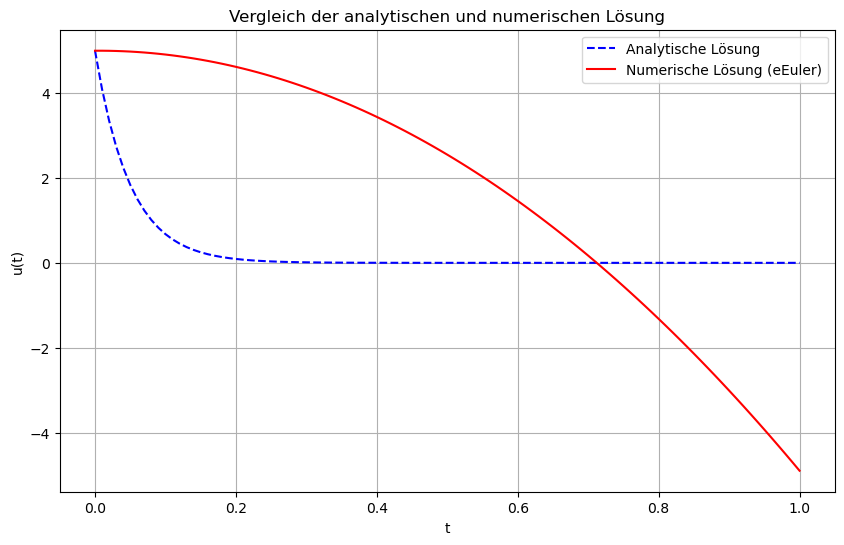

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from eEuler import eEuler
# import iEuler
# import rk4


if __name__ == "__main__":

    u0 = 5 
    N = 1
    T_INTERVAL = [0, N]
    STEPS = 100

    def function_a(u, t):
        return -20 * u

    def an_method(t):
        return 5 * np.exp(-20 * t)


    eEuler_solver = eEuler(function_a, T_INTERVAL, u0, STEPS)
    # iEuler_solver = eEuler(fun, T_INTERVAL, u0, steps)
    # rk4_solver = eEuler(fun, T_INTERVAL, u0, steps)

    eEuler_solution, t_list = eEuler_solver.call()
    exact_solution = np.array([an_method(t) for t in t_list])

    print("t_list:", t_list)



    # Visualisierung
    plt.figure(figsize=(10, 6))
    plt.plot(t_list, exact_solution, label="Analytische Lösung", linestyle="--", color="blue")
    plt.plot(t_list, eEuler_solution, label="Numerische Lösung (eEuler)", linestyle="-", color="red")



    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.title("Vergleich der analytischen und numerischen Lösung")
    plt.legend()
    plt.grid()
    plt.show()


In [8]:
class ExplicitEuler:
    def __init__(self, f, u0, T, h):
        """
        f  : function f(u, t) defining the ODE du/dt = f(u, t)
        u0 : initial condition
        T  : total time
        h  : time step
        """
        self.f = f
        self.u0 = u0
        self.T = T
        self.h = h
        self.N = int(T / h)
        self.t = np.linspace(0, T, self.N + 1)
        self.u = np.zeros(self.N + 1)
        self.u[0] = u0
 
    def solve(self):
        """Perform the explicit Euler method."""
        for n in range(self.N):
            self.u[n + 1] = self.u[n] + self.h * self.f(self.u[n], self.t[n])
        return self.t, self.u

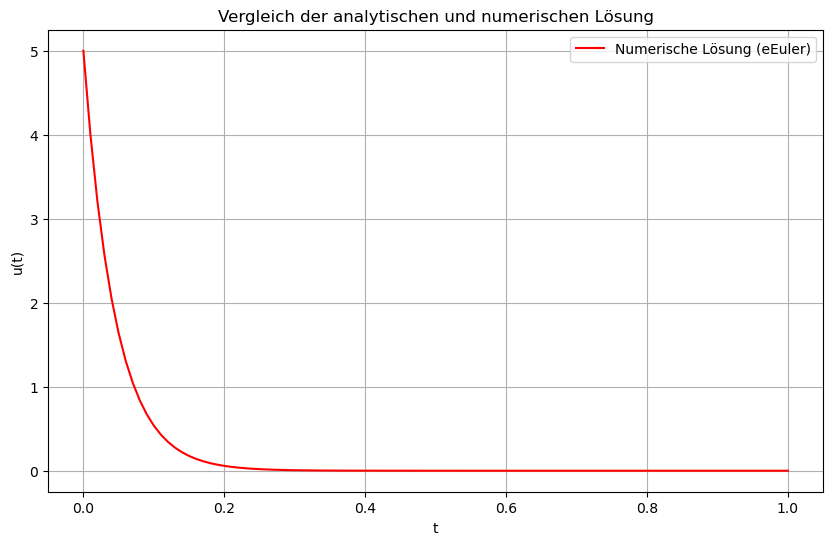

In [9]:
# Parameters
u0 = 5
T = 1
h = 0.01

def function_a(u, t):
    return -20 * u


# Solve using Explicit Euler
solver = ExplicitEuler(function_a, u0, T, h)
t, u = solver.solve()





# Visualisierung
plt.figure(figsize=(10, 6))
# plt.plot(t_list, exact_solution, label="Analytische Lösung", linestyle="--", color="blue")
plt.plot(t, u, label="Numerische Lösung (eEuler)", linestyle="-", color="red")



plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Vergleich der analytischen und numerischen Lösung")
plt.legend()
plt.grid()
plt.show()

